In [1]:
import pandas as pd
import glob
import re 

# Il percorso relativo alla cartella dei dati
data_path = '../data/tennis_atp/atp_matches_*.csv' 

all_files = glob.glob(data_path)

# Filtro più robusto: prendiamo solo i file che finiscono con un anno di 4 cifre.
# Esempio: atp_matches_2023.csv -> MATCH!
# Esempio: atp_matches_amateur.csv -> NO MATCH!

# Usiamo un'espressione regolare per cercare 4 cifre alla fine del nome del file
year_pattern = re.compile(r'atp_matches_(\d{4})\.csv$')

all_files_filtered = []
for f in all_files:
    # re.search() cerca il pattern nella stringa f
    match = year_pattern.search(f)
    # Se trova una corrispondenza e l'anno è >= 2000...
    if match and int(match.group(1)) >= 2000:
        all_files_filtered.append(f)

print(f"Trovati {len(all_files_filtered)} file di match principali dal 2000 in poi.")

Trovati 0 file di match principali dal 2000 in poi.


In [2]:
li = []
# Ordiniamo i file per essere sicuri che i dati siano caricati cronologicamente
for filename in sorted(all_files_filtered):
    print(f"Caricamento: {filename}") # Aggiungiamo un print per vedere cosa sta caricando
    df = pd.read_csv(filename, index_col=None, header=0, low_memory=False) # low_memory=False può prevenire warning su tipi misti
    li.append(df)


Caricamento: tennis_atp/atp_matches_2000.csv
Caricamento: tennis_atp/atp_matches_2001.csv
Caricamento: tennis_atp/atp_matches_2002.csv
Caricamento: tennis_atp/atp_matches_2003.csv
Caricamento: tennis_atp/atp_matches_2004.csv
Caricamento: tennis_atp/atp_matches_2005.csv
Caricamento: tennis_atp/atp_matches_2006.csv
Caricamento: tennis_atp/atp_matches_2007.csv
Caricamento: tennis_atp/atp_matches_2008.csv
Caricamento: tennis_atp/atp_matches_2009.csv
Caricamento: tennis_atp/atp_matches_2010.csv
Caricamento: tennis_atp/atp_matches_2011.csv
Caricamento: tennis_atp/atp_matches_2012.csv
Caricamento: tennis_atp/atp_matches_2013.csv
Caricamento: tennis_atp/atp_matches_2014.csv
Caricamento: tennis_atp/atp_matches_2015.csv
Caricamento: tennis_atp/atp_matches_2016.csv
Caricamento: tennis_atp/atp_matches_2017.csv
Caricamento: tennis_atp/atp_matches_2018.csv
Caricamento: tennis_atp/atp_matches_2019.csv
Caricamento: tennis_atp/atp_matches_2020.csv
Caricamento: tennis_atp/atp_matches_2021.csv
Caricament

In [3]:
# Se la lista non è vuota, procediamo
if li:
    data = pd.concat(li, axis=0, ignore_index=True)

    print(f"\nDati caricati con successo! Numero totale di match: {len(data)}")
    print("Informazioni sul DataFrame:")
    data.info()
else:
    print("\nNessun file trovato che corrisponda ai criteri. Controlla il percorso e il pattern.")


Dati caricati con successo! Numero totale di match: 74906
Informazioni sul DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74906 entries, 0 to 74905
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          74906 non-null  object 
 1   tourney_name        74906 non-null  object 
 2   surface             74853 non-null  object 
 3   draw_size           74906 non-null  int64  
 4   tourney_level       74906 non-null  object 
 5   tourney_date        74906 non-null  int64  
 6   match_num           74906 non-null  int64  
 7   winner_id           74906 non-null  int64  
 8   winner_seed         31120 non-null  float64
 9   winner_entry        9506 non-null   object 
 10  winner_name         74906 non-null  object 
 11  winner_hand         74906 non-null  object 
 12  winner_ht           73481 non-null  float64
 13  winner_ioc          74906 non-null  object 
 14  winner_age     

In [4]:
data.shape

(74906, 49)

In [5]:
data.head()  # Mostra le prime righe del DataFrame per confermare il caricamento corretto

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-301,Auckland,Hard,32,A,20000110,1,103163,1.0,NaN,...,55.0,39.0,29.0,17.0,4.0,7.0,11.0,1612.0,63.0,595.0
1,2000-301,Auckland,Hard,32,A,20000110,2,102607,NaN,Q,...,32.0,25.0,18.0,12.0,3.0,6.0,211.0,157.0,49.0,723.0
2,2000-301,Auckland,Hard,32,A,20000110,3,103252,NaN,NaN,...,33.0,20.0,7.0,8.0,7.0,11.0,48.0,726.0,59.0,649.0
3,2000-301,Auckland,Hard,32,A,20000110,4,103507,7.0,NaN,...,43.0,29.0,14.0,10.0,6.0,8.0,45.0,768.0,61.0,616.0
4,2000-301,Auckland,Hard,32,A,20000110,5,102103,NaN,Q,...,46.0,34.0,18.0,12.0,5.0,9.0,167.0,219.0,34.0,873.0


In [6]:
# Mostra un riassunto delle colonne, dei loro tipi e dei valori non nulli
print("Informazioni sul DataFrame:")
data.info(verbose=True, show_counts=True)

Informazioni sul DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74906 entries, 0 to 74905
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          74906 non-null  object 
 1   tourney_name        74906 non-null  object 
 2   surface             74853 non-null  object 
 3   draw_size           74906 non-null  int64  
 4   tourney_level       74906 non-null  object 
 5   tourney_date        74906 non-null  int64  
 6   match_num           74906 non-null  int64  
 7   winner_id           74906 non-null  int64  
 8   winner_seed         31120 non-null  float64
 9   winner_entry        9506 non-null   object 
 10  winner_name         74906 non-null  object 
 11  winner_hand         74906 non-null  object 
 12  winner_ht           73481 non-null  float64
 13  winner_ioc          74906 non-null  object 
 14  winner_age          74901 non-null  float64
 15  loser_id            74906

In [7]:
# Controlla le colonne con più valori mancanti
print("\nColonne con il maggior numero di valori mancanti:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0].sort_values(ascending=False))


Colonne con il maggior numero di valori mancanti:
winner_entry          65400
loser_entry           59484
loser_seed            57668
winner_seed           43786
minutes                8174
w_2ndWon               6520
w_1stWon               6520
l_1stIn                6520
l_svpt                 6520
l_df                   6520
l_ace                  6520
w_bpFaced              6520
w_bpSaved              6520
w_SvGms                6520
w_df                   6520
w_1stIn                6520
w_svpt                 6520
l_2ndWon               6520
w_ace                  6520
l_SvGms                6520
l_bpSaved              6520
l_bpFaced              6520
l_1stWon               6520
loser_ht               2909
loser_rank             1468
loser_rank_points      1468
winner_ht              1425
winner_rank             573
winner_rank_points      573
surface                  53
winner_age                5
loser_hand                4
loser_age                 3
dtype: int64


In [8]:
# Converti la colonna della data in un formato datetime
data['tourney_date'] = pd.to_datetime(data['tourney_date'], format='%Y%m%d')

# Selezioniamo solo le colonne che ci interessano per ora, per semplificare
# Man mano che andiamo avanti, ne aggiungeremo altre
cols_to_keep = [
    'tourney_id', 'tourney_name', 'surface', 'tourney_level', 'tourney_date',
    'match_num', 'winner_id', 'winner_name', 'loser_id', 'loser_name',
    'score', 'best_of', 'round',
    'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'
]

# Aggiungeremo le colonne delle statistiche (ace, df, etc.) dopo,
# perché hanno molti valori mancanti da gestire

data_simple = data[cols_to_keep].copy() # Usiamo .copy() per evitare warning

# Ordiniamo i dati cronologicamente, fondamentale per i passi successivi
data_simple = data_simple.sort_values(by='tourney_date').reset_index(drop=True)

print("\nDataset semplificato e ordinato. Prime 5 righe:")
display(data_simple.head())

print("\nUltimi 5 match nel dataset:")
display(data_simple.tail())


Dataset semplificato e ordinato. Prime 5 righe:


,tourney_id,tourney_name,surface,tourney_level,tourney_date,match_num,winner_id,winner_name,loser_id,loser_name,score,best_of,round,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-339,Adelaide,Hard,A,2000-01-03,30,103720,Lleyton Hewitt,102765,Nicolas Escude,3-6 6-1 6-4,3,SF,25.0,1429.0,37.0,995.0
1,2000-339,Adelaide,Hard,A,2000-01-03,2,103819,Roger Federer,102533,Jens Knippschild,6-1 6-4,3,R32,64.0,749.0,91.0,525.0
2,2000-339,Adelaide,Hard,A,2000-01-03,1,102358,Thomas Enqvist,103096,Arnaud Clement,6-3 6-4,3,R32,4.0,2606.0,56.0,805.0
3,2000-451,Doha,Hard,A,2000-01-03,1,103017,Nicolas Kiefer,101543,Jeff Tarango,7-6(6) 7-6(6),3,R32,6.0,2447.0,55.0,814.0
4,2000-451,Doha,Hard,A,2000-01-03,2,101750,Cristiano Caratti,102730,Ivo Heuberger,7-6(4) 4-6 6-4,3,R32,213.0,190.0,221.0,185.0



Ultimi 5 match nel dataset:


,tourney_id,tourney_name,surface,tourney_level,tourney_date,match_num,winner_id,winner_name,loser_id,loser_name,score,best_of,round,winner_rank,winner_rank_points,loser_rank,loser_rank_points
74901,2024-7696,Next Gen Finals,Hard,F,2024-12-18,387,210460,Nishesh Basavareddy,209992,Juncheng Shang,3-4(4) 4-2 4-2 4-1,5,RR,138.0,440.0,50.0,1115.0
74902,2024-7696,Next Gen Finals,Hard,F,2024-12-18,388,209414,Luca Van Assche,209992,Juncheng Shang,4-3(3) 2-4 4-1 4-3(5),5,RR,128.0,471.0,50.0,1115.0
74903,2024-7696,Next Gen Finals,Hard,F,2024-12-18,389,210506,Alex Michelsen,210460,Nishesh Basavareddy,2-4 4-3(5) 4-3(4) 4-2,5,RR,41.0,1245.0,138.0,440.0
74904,2024-7696,Next Gen Finals,Hard,F,2024-12-18,391,210506,Alex Michelsen,209992,Juncheng Shang,4-1 1-1 RET,5,RR,41.0,1245.0,50.0,1115.0
74905,2024-7696,Next Gen Finals,Hard,F,2024-12-18,395,211663,Joao Fonseca,209950,Arthur Fils,3-4(9) 4-2 4-1 1-4 4-1,5,RR,145.0,409.0,20.0,2355.0


### 1.4: Exploratory Data Analysis (EDA)

1. Sanity Check: How many missing values do we have in the key columns?

In [9]:
# Controlliamo i valori mancanti nel nostro DataFrame semplificato
print("Valori mancanti per colonna:")
missing_data = data_simple.isnull().sum()
print(missing_data[missing_data > 0])

Valori mancanti per colonna:
surface                 53
winner_rank            573
winner_rank_points     573
loser_rank            1468
loser_rank_points     1468
dtype: int64


2. Overview: How is tennis distributed over time and surfaces?

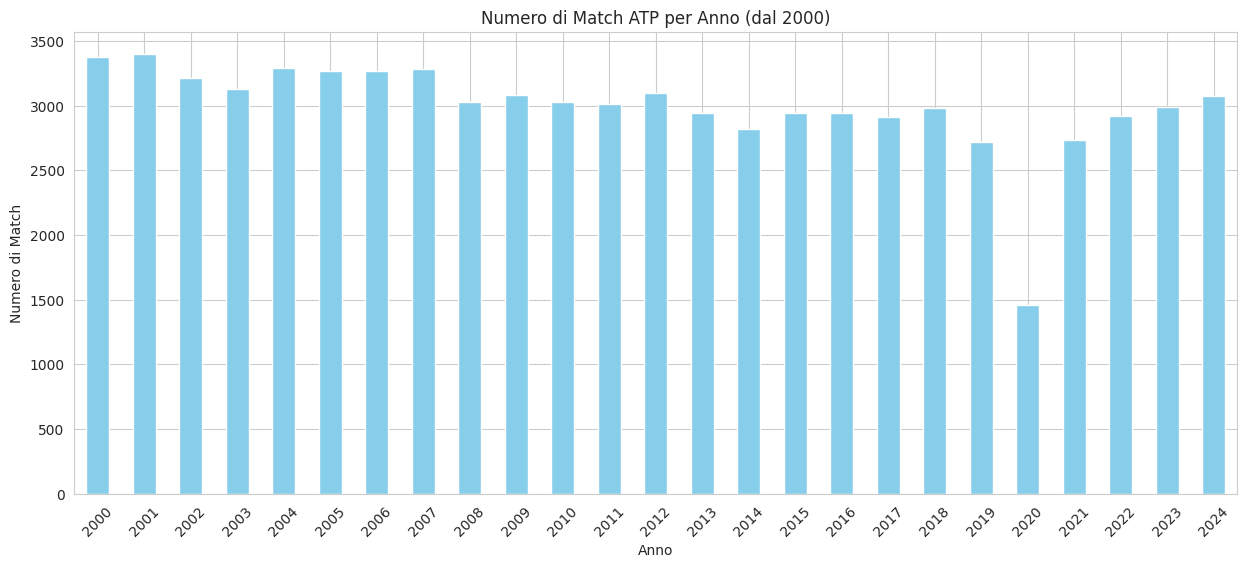

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Impostiamo uno stile grafico più gradevole
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 6) # Imposta la dimensione delle figure

# A. Quanti match all'anno ci sono nel nostro dataset?
data_simple['year'] = data_simple['tourney_date'].dt.year
match_counts_per_year = data_simple['year'].value_counts().sort_index()

match_counts_per_year.plot(kind='bar', color='skyblue')
plt.title('Numero di Match ATP per Anno (dal 2000)')
plt.xlabel('Anno')
plt.ylabel('Numero di Match')
plt.xticks(rotation=45)
plt.show()

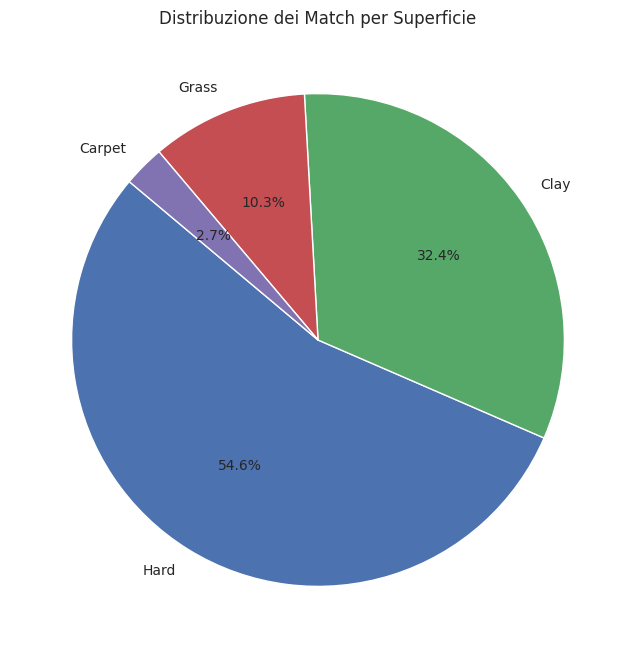

In [11]:
# B. Quali sono le superfici più comuni?
surface_counts = data_simple['surface'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(surface_counts, labels=surface_counts.index, autopct='%1.1f%%', startangle=140, colors=['#4c72b0', '#55a868', '#c44e52', '#8172b2'])
plt.title('Distribuzione dei Match per Superficie')
plt.ylabel('') # Nasconde l'etichetta dell'asse y
plt.show()

3. Key Hypothesis: Is ranking a good predictor?

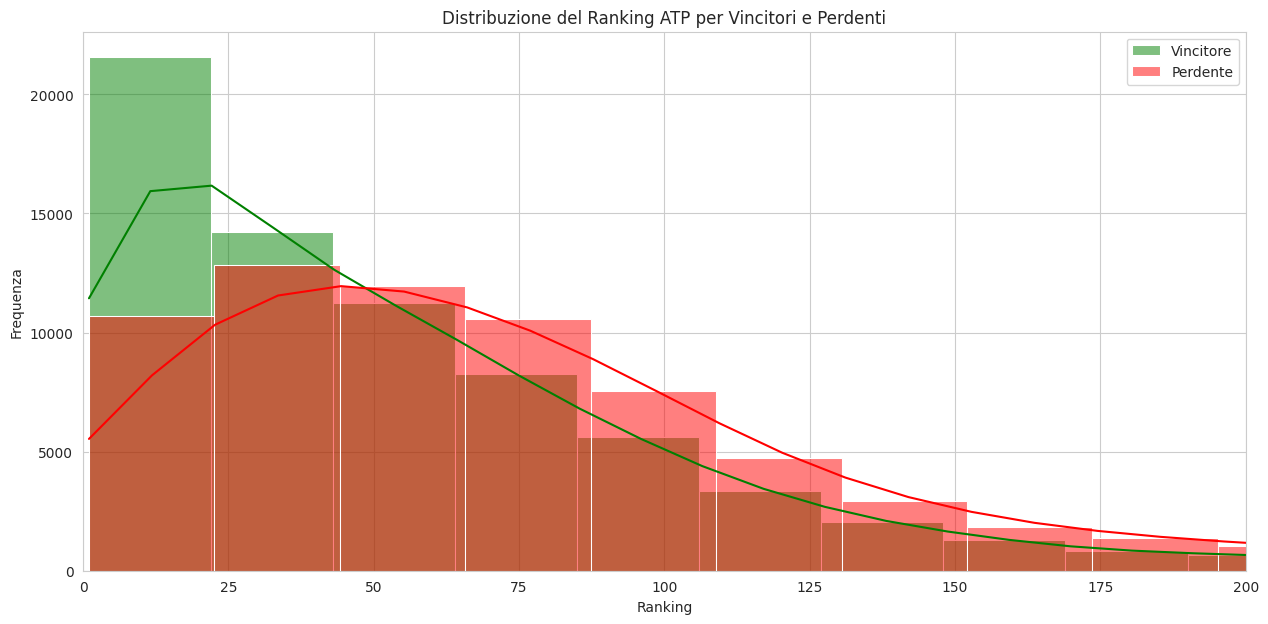

In [12]:
# Rimuoviamo le righe dove il ranking non è disponibile per questa analisi specifica
data_ranks = data_simple.dropna(subset=['winner_rank', 'loser_rank'])

plt.figure(figsize=(15, 7))
sns.histplot(data_ranks['winner_rank'], color="green", label='Vincitore', kde=True, bins=100)
sns.histplot(data_ranks['loser_rank'], color="red", label='Perdente', kde=True, bins=100)
plt.title('Distribuzione del Ranking ATP per Vincitori e Perdenti')
plt.xlabel('Ranking')
plt.ylabel('Frequenza')
plt.legend()
plt.xlim(0, 200) # Limitiamo l'asse x per vedere meglio i top player
plt.show()

4. Insight: Who are the rulers of the various surfaces?

In [13]:
# Raggruppiamo per superficie e contiamo le vittorie per ogni giocatore
surface_kings = data_simple.groupby('surface')['winner_name'].value_counts()

print("--- Top 5 Vincitori su Terra Battuta (Clay) ---")
print(surface_kings['Clay'].head(5))
print("\n--- Top 5 Vincitori su Cemento (Hard) ---")
print(surface_kings['Hard'].head(5))
print("\n--- Top 5 Vincitori su Erba (Grass) ---")
print(surface_kings['Grass'].head(5))

--- Top 5 Vincitori su Terra Battuta (Clay) ---
winner_name
Rafael Nadal       488
David Ferrer       337
Novak Djokovic     291
Nicolas Almagro    281
Tommy Robredo      259
Name: count, dtype: int64

--- Top 5 Vincitori su Cemento (Hard) ---
winner_name
Roger Federer     785
Novak Djokovic    718
Rafael Nadal      525
Andy Murray       510
Andy Roddick      424
Name: count, dtype: int64

--- Top 5 Vincitori su Erba (Grass) ---
winner_name
Roger Federer      194
Novak Djokovic     121
Andy Murray        120
Lleyton Hewitt     118
Feliciano Lopez     89
Name: count, dtype: int64


# Section 2: Baseline Model Construction

In this section, we describe the process and results of building our strong baseline model, an **XGBoost classifier**. The goal is to establish a robust performance benchmark to evaluate our Graph Neural Network model against.

The entire pipeline for this baseline—from data loading to feature engineering and a rigorous evaluation protocol—was executed via standalone Python scripts (`data_loader.py`, `feature_engineering.py`, `train_baseline.py`) to handle the long computation times. Here, we will load and analyze the final results produced by these scripts.

## 2.1 Methodology

Our baseline model was built following a comprehensive and robust methodology:

1.  **Feature Engineering**: We engineered a rich set of features for each match, including:
    *   **Dynamic Ratings**: A player's **Elo rating** before each match.
    *   **Historical Context**: Head-to-Head (H2H) records and winning streaks.
    *   **Physical State**: A fatigue proxy based on time on court in the last 7 days.
    *   **Demographics**: The age difference between players.
    *   **Match Context**: The type of court surface (Hard, Clay, Grass, Carpet).

2.  **Evaluation Protocol**: To get a reliable performance estimate, we used a rigorous procedure:
    *   **Temporal Cross-Validation**: We used a `TimeSeriesSplit` with 5 folds to ensure we always train on past data to predict the future.
    *   **Hyperparameter Tuning**: For each fold, we performed a `RandomizedSearchCV` to find the best XGBoost hyperparameters.
    *   **Multiple Runs**: The entire process was repeated **10 times** with different random seeds to ensure the stability of our results.

The final results, including the out-of-fold Log-Loss for each of the 10 runs, were logged to a JSON file (`baseline_results.json`).

In [26]:
import pandas as pd
import json
from tabulate import tabulate

# --- Load the Baseline Results from the JSON File ---
baseline_results_filepath = "../results/baseline_results.json"
try:
    with open(baseline_results_filepath, 'r') as f:
        baseline_data = json.load(f)
    
    baseline_results_df = pd.DataFrame(baseline_data)
    baseline_scores = baseline_results_df['log_loss']
    
    print("--- Baseline Model Final Performance Summary ---")
    print(f"Results from {len(baseline_results_df)} independent runs:\n")
    
    # --- Create data for the table ---
    summary_data = [
        ["Mean Log-Loss", f"{baseline_scores.mean():.4f}"],
        ["Std. Dev.", f"{baseline_scores.std():.4f}"],
        ["Min Log-Loss (Best)", f"{baseline_scores.min():.4f}"],
        ["Max Log-Loss (Worst)", f"{baseline_scores.max():.4f}"]
    ]
    
    headers = ["Metric", "Score"]
    
    # Display the formatted table using tabulate
    print(tabulate(summary_data, headers=headers, tablefmt="grid"))

except FileNotFoundError:
    print(f"Error: The results file '{baseline_results_filepath}' was not found.")
    print("Please run the 'src/baseline/train_baseline.py' script first.")
except Exception as e:
    print(f"An error occurred: {e}")

--- Baseline Model Final Performance Summary ---
Results from 10 independent runs:

+----------------------+---------+
| Metric               |   Score |
+======================+=========+
| Mean Log-Loss        |  0.6337 |
+----------------------+---------+
| Std. Dev.            |  0.0081 |
+----------------------+---------+
| Min Log-Loss (Best)  |  0.6223 |
+----------------------+---------+
| Max Log-Loss (Worst) |  0.648  |
+----------------------+---------+


# Section 3: Graph-Based Model (GNN)

This section details our primary contribution: a Graph Neural Network (GNN) model for tennis match prediction. This approach moves beyond traditional instance-based features and models the entire ecosystem of players as a relational graph.

The pipeline for building, training, and evaluating this model was executed via the standalone Python script `src/gnn/train_gnn.py`.

## 3.1 GNN Methodology

Our graph-based approach followed a rigorous, end-to-end pipeline:

1.  **Graph Construction**: The entire history of matches from the training period was converted into a directed graph where:
    *   **Nodes**: Represent a unique player.
    *   **Edges**: Represent a match, with a directed edge from the winner to the loser.

2.  **Model Architecture**: We implemented a `GNNLinkPredictor` model using **GraphSAGE** layers. This model does not rely on hand-crafted features; instead, it learns a dense vector representation (**embedding**) for each player directly from the graph's structure.

3.  **Robust Evaluation Protocol**: To ensure a fair comparison with our baseline, we applied the exact same evaluation methodology:
    *   **Temporal Cross-Validation**: We used a `TimeSeriesSplit` with 5 folds. For each fold, the graph was rebuilt using only the training data for that specific time window.
    *   **Varied Hyperparameters**: The entire process was repeated **10 times**, each time using a different set of pre-defined hyperparameters (`learning_rate`, `network dimensions`, etc.) to test a variety of model configurations.

The final out-of-fold Log-Loss for each of the 10 runs was logged to `results/gnn_results.json`.

In [28]:
import pandas as pd
import json
from tabulate import tabulate

# --- Load the GNN Results from the JSON File ---
gnn_results_filepath = "../results/gnn_results.json"
try:
    with open(gnn_results_filepath, 'r') as f:
        gnn_results_data = json.load(f)
    
    gnn_results_df = pd.DataFrame(gnn_results_data)
    gnn_scores_for_ttest = gnn_results_df['log_loss']
    
    print("--- GNN Model Final Performance Summary ---")
    print(f"Results from {len(gnn_results_df)} independent runs:\n")

    # --- Create data for the table ---
    summary_data = [
        ["Mean Log-Loss", f"{gnn_scores_for_ttest.mean():.4f}"],
        ["Std. Dev.", f"{gnn_scores_for_ttest.std():.4f}"],
        ["Min Log-Loss (Best)", f"{gnn_scores_for_ttest.min():.4f}"],
        ["Max Log-Loss (Worst)", f"{gnn_scores_for_ttest.max():.4f}"]
    ]

    headers = ["Metric", "Score"]
    
    # Display the formatted table using tabulate
    print(tabulate(summary_data, headers=headers, tablefmt="grid"))

except FileNotFoundError:
    print(f"Error: The results file '{gnn_results_filepath}' was not found.")
    print("Please run the 'src/gnn/train_gnn.py' script first.")
except Exception as e:
    print(f"An error occurred: {e}")

--- GNN Model Final Performance Summary ---
Results from 10 independent runs:

+----------------------+---------+
| Metric               |   Score |
+======================+=========+
| Mean Log-Loss        |  0.5016 |
+----------------------+---------+
| Std. Dev.            |  0.0149 |
+----------------------+---------+
| Min Log-Loss (Best)  |  0.4871 |
+----------------------+---------+
| Max Log-Loss (Worst) |  0.5288 |
+----------------------+---------+


# Section 4: Final Model Comparison and Conclusion

In this final section, we directly compare the performance of our robust XGBoost baseline against the GNN model. We will use a statistical test to determine if the GNN's superior performance is statistically significant, and then draw our final conclusions.

In [31]:
import pandas as pd
import json
from scipy.stats import ttest_rel
from tabulate import tabulate # Import the library

# --- 1. Load Results from Both Models ---
try:
    baseline_df = pd.read_json('../results/baseline_results.json')
    baseline_scores = baseline_df['log_loss']
    
    gnn_df = pd.read_json('../results/gnn_results.json')
    gnn_scores = gnn_df['log_loss']
    
    print("Results for both models loaded successfully.")

    # --- 2. Create a Summary Comparison Table ---
    summary_data = {
        'Metric': ['Mean Log-Loss', 'Std Dev Log-Loss', 'Min Log-Loss (Best)', 'Max Log-Loss (Worst)'],
        'XGBoost Baseline': [
            baseline_scores.mean(), baseline_scores.std(),
            baseline_scores.min(), baseline_scores.max()
        ],
        'GNN Model': [
            gnn_scores.mean(), gnn_scores.std(),
            gnn_scores.min(), gnn_scores.max()
        ]
    }
    comparison_table = pd.DataFrame(summary_data).set_index('Metric')

    print("\n--- Overall Model Performance Comparison ---")
    display(comparison_table.round(4))

    # --- 3. Statistical Significance Test (Paired T-test) ---
    if len(baseline_scores) == len(gnn_scores):
        
        t_statistic, p_value = ttest_rel(baseline_scores, gnn_scores)
        alpha = 0.05
        
        if p_value < alpha:
            conclusion = "✅ Statistically Significant"
            explanation = "The p-value is significantly less than 0.05. We can confidently reject the null hypothesis and conclude that the GNN model's\nperformance improvement is not due to random chance."
        else:
            conclusion = "⚠️ Not Statistically Significant"
            explanation = "The p-value is not less than 0.05. We cannot reject the null hypothesis; the observed performance difference could be due to random chance."

        # --- PRETTY PRINTING WITH TABULATE ---
        
        table_data = [
            ["T-statistic", f"{t_statistic:.4f}"],
            ["P-value", f"{p_value:.6f}"],
            ["Significance Level (α)", f"{alpha:.2f}"],
            ["Conclusion", conclusion]
        ]
        
        headers = ["Metric", "Value"]
        
        print("\n\n--- Statistical Significance (Paired T-test) ---")
        # The 'fancy_grid' style uses unicode characters but tabulate handles alignment
        print(tabulate(table_data, headers=headers, tablefmt="fancy_grid", stralign="left", numalign="right"))
        
        print(f"\nExplanation: {explanation}")
        
    else:
        print("\nCannot perform t-test: The number of runs for baseline and GNN models do not match.")

except FileNotFoundError as e:
    print(f"Error: Could not find one or both results files.")
    print(f"Details: {e}")
    print("Please ensure both 'train_baseline.py' and 'train_gnn.py' have been run successfully.")

Results for both models loaded successfully.

--- Overall Model Performance Comparison ---


,XGBoost Baseline,GNN Model
Metric,,
Mean Log-Loss,0.6337,0.5016
Std Dev Log-Loss,0.0081,0.0149
Min Log-Loss (Best),0.6223,0.4871
Max Log-Loss (Worst),0.6480,0.5288




--- Statistical Significance (Paired T-test) ---
╒════════════════════════╤══════════════════════════════╕
│ Metric                 │ Value                        │
╞════════════════════════╪══════════════════════════════╡
│ T-statistic            │ 32.9627                      │
├────────────────────────┼──────────────────────────────┤
│ P-value                │ 0.000000                     │
├────────────────────────┼──────────────────────────────┤
│ Significance Level (α) │ 0.05                         │
├────────────────────────┼──────────────────────────────┤
│ Conclusion             │ ✅ Statistically Significant │
╘════════════════════════╧══════════════════════════════╛

Explanation: The p-value is significantly less than 0.05. We can confidently reject the null hypothesis and conclude that the GNN model's
performance improvement is not due to random chance.


# Section 5: GNN Insights and Qualitative Analysis

The quantitative results have clearly demonstrated the superior predictive power of the GNN model. In this section, we delve deeper to understand *what* the model has learned by visualizing the player embeddings it generated.

This analysis allows us to move beyond abstract metrics like Log-Loss and see if the model has captured intuitive, real-world structures within the sport of tennis.

In [37]:
import torch
import json
import pandas as pd
from sklearn.manifold import TSNE
import plotly.express as px
import sys
import os

# --- Add project root to Python path ---
try:
    project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
except NameError:
    project_root = os.path.abspath(os.path.join('.', '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from src.data_processing.data_loader import load_and_prepare_data

# --- 1. Load All Required Data ---
print("Loading all necessary data for analysis...")
try:
    embeddings_path = os.path.join(project_root, 'results', 'best_gnn_embeddings.pt')
    player_map_path = os.path.join(project_root, 'results', 'best_player_map.json')
    data_path_pattern = os.path.join(project_root, 'data', 'tennis_atp', 'atp_matches_*.csv')

    final_embeddings = torch.load(embeddings_path)
    with open(player_map_path, 'r') as f:
        player_to_idx_str_keys = json.load(f)
        player_to_idx = {int(k): v for k, v in player_to_idx_str_keys.items()}
    
    raw_df = load_and_prepare_data(path_pattern=data_path_pattern)
    print("Artifacts and raw data loaded successfully.")
    
    # --- 2. Create Mappings ---
    id_to_name_map = pd.concat([
        raw_df[['winner_id', 'winner_name']].rename(columns={'winner_id': 'id', 'winner_name': 'name'}),
        raw_df[['loser_id', 'loser_name']].rename(columns={'loser_id': 'id', 'loser_name': 'name'})
    ]).drop_duplicates(subset='id').set_index('id')['name']
    
    idx_to_player_id = {idx: player_id for player_id, idx in player_to_idx.items()}

    # --- 3. Perform t-SNE Dimensionality Reduction ---
    print("\nPerforming t-SNE reduction...")
    
    # --- CORRECTION IS HERE: Removed the deprecated 'n_iter' argument ---
    tsne = TSNE(
        n_components=2, 
        perplexity=40,
        random_state=42
    )
    # --------------------------------------------------------------------
    
    embeddings_2d = tsne.fit_transform(final_embeddings.cpu().numpy())
    print("t-SNE reduction complete.")

    # --- 4. Prepare DataFrame for Plotting ---
    player_names = [id_to_name_map.get(idx_to_player_id.get(i), f"Unknown_ID_{i}") for i in range(len(player_to_idx))]

    plot_df = pd.DataFrame({
        'x': embeddings_2d[:, 0],
        'y': embeddings_2d[:, 1],
        'player_name': player_names,
        'player_id': [idx_to_player_id.get(i) for i in range(len(player_to_idx))]
    })
    
    print("\nDataFrame for visualization is ready.")

except FileNotFoundError as e:
    print(f"Error: Could not find a required results file.")
    print("Please ensure that the training scripts have been run.")
    print(f"Details: {e}")

Loading all necessary data for analysis...
--- Section 1: Loading and Preparing Raw Data ---
Loading 25 files from year 2000 onwards...
Loaded 74906 matches.
Data loading and basic preparation complete.
Artifacts and raw data loaded successfully.

Performing t-SNE reduction...
t-SNE reduction complete.

DataFrame for visualization is ready.


In [38]:
# This cell creates the interactive visualization of the player embeddings.
if 'plot_df' in locals():
    print("Creating interactive plot...")

    fig = px.scatter(
        plot_df,
        x='x',
        y='y',
        hover_name='player_name',
        title='2D Visualization of Player Embeddings using t-SNE',
        labels={'x': 't-SNE Dimension 1', 'y': 't-SNE Dimension 2'}
    )
    fig.update_traces(marker=dict(size=5, opacity=0.7))
    fig.update_layout(width=950, height=800, title_font_size=20)
    fig.show()
else:
    print("DataFrame for plotting ('plot_df') not found. Please run the previous cell.")

Creating interactive plot...


## 5.1 Analysis of the "Golden Era" Cluster

The t-SNE visualization of the learned player embeddings reveals a prominent and dense cluster of players. Interactive exploration of this cluster (highlighted in the plot) shows that it contains the dominant figures of the "Golden Era" of tennis: `Roger Federer`, `Rafael Nadal`, `Novak Djokovic`, and `Andy Murray`.

Interestingly, the model also places other high-profile players from that era within or very near this cluster, such as `Stan Wawrinka`, `Gael Monfils`, `Andreas Seppi`, `Feliciano Lopez`, and `Nicolas Almagro`.

This suggests that the GNN has learned to represent not just "skill" in isolation, but a combination of factors including:
-   **Dominance**: The Big 4 form the core of the cluster due to their high number of victories against each other and against other top players.
-   **Longevity and Connectivity**: Players like Seppi and Monfils, due to their exceptionally long careers, acted as highly connected nodes within the same competitive ecosystem, frequently playing against the top players. This high degree of interaction pulled their embeddings into this region.
-   **Tier-2 Elite**: Players like Wawrinka and Almagro were consistent top-10/top-20 contenders who frequently reached the later stages of major tournaments, thus sharing a similar "path" in the graph as the very top players.

This qualitative result demonstrates the GNN's ability to capture nuanced, real-world relational structures that go beyond simple win/loss statistics, providing a rich, contextual understanding of the player landscape.

In [39]:
import numpy as np

if 'plot_df' in locals() and 'raw_df' in locals():
    try:
        # --- 1. Define the Elite Cluster and Seppi's ID ---
        elite_cluster_names = [
            'Roger Federer', 'Rafael Nadal', 'Novak Djokovic', 'Andy Murray',
            'Andy Roddick', 'Lleyton Hewitt', 'Gael Monfils', 'Feliciano Lopez'
        ]
        
        # Get IDs from our plot_df, which is guaranteed to contain players from the graph
        elite_ids = plot_df[plot_df['player_name'].isin(elite_cluster_names)]['player_id'].unique()
        seppi_id = plot_df[plot_df['player_name'] == 'Andreas Seppi']['player_id'].iloc[0]
        
        print(f"Andreas Seppi's Player ID: {seppi_id}")
        print("-" * 50)

        # --- 2. Test Hypothesis 1: Longevity & Connectivity ---
        print("Hypothesis 1: How many times did Seppi play against the elite cluster?")
        
        seppi_vs_elite_matches = raw_df[
            ((raw_df['winner_id'] == seppi_id) & (raw_df['loser_id'].isin(elite_ids))) |
            ((raw_df['loser_id'] == seppi_id) & (raw_df['winner_id'].isin(elite_ids)))
        ].copy()
        
        num_matches_vs_elite = len(seppi_vs_elite_matches)
        print(f"-> Andreas Seppi played a total of {num_matches_vs_elite} matches against these elite players.")
        
        if num_matches_vs_elite > 0:
            seppi_vs_elite_matches['opponent_name'] = np.where(
                seppi_vs_elite_matches['winner_name'] == 'Andreas Seppi',
                seppi_vs_elite_matches['loser_name'],
                seppi_vs_elite_matches['winner_name']
            )
            display(seppi_vs_elite_matches['opponent_name'].value_counts().reset_index().rename(columns={'opponent_name': 'Matches Played', 'count': 'count'}))

        # --- 3. Test Hypothesis 2: "Giant Killer" Wins ---
        print("\n" + "-" * 50)
        print("Hypothesis 2: How many times did Seppi beat a Top-10 player?")
        
        seppi_top10_wins = raw_df[
            (raw_df['winner_id'] == seppi_id) & (raw_df['loser_rank'] <= 10)
        ]
        
        num_top10_wins = len(seppi_top10_wins)
        print(f"-> Andreas Seppi has {num_top10_wins} recorded wins against Top-10 players.")
        
        if num_top10_wins > 0:
            print("\nDetails of Seppi's Top-10 Wins:")
            display(seppi_top10_wins[['tourney_date', 'tourney_name', 'surface', 'round', 'loser_name', 'loser_rank', 'score']])

    except IndexError:
        print("Could not find Andreas Seppi or elite players in the current graph data.")
    except Exception as e:
        print(f"An error occurred during analysis: {e}")
else:
    print("Required data for analysis not found. Please run all previous cells.")

Andreas Seppi's Player ID: 104312
--------------------------------------------------
Hypothesis 1: How many times did Seppi play against the elite cluster?
-> Andreas Seppi played a total of 65 matches against these elite players.


,Matches Played,count
0,Roger Federer,15
1,Novak Djokovic,12
2,Rafael Nadal,9
3,Andy Murray,9
4,Lleyton Hewitt,7
5,Gael Monfils,7
6,Feliciano Lopez,4
7,Andy Roddick,2



--------------------------------------------------
Hypothesis 2: How many times did Seppi beat a Top-10 player?
-> Andreas Seppi has 10 recorded wins against Top-10 players.

Details of Seppi's Top-10 Wins:


,tourney_date,tourney_name,surface,round,loser_name,loser_rank,score
17788,2005-05-09,Hamburg Masters,Clay,R32,Guillermo Canas,10.0,7-6(9) 6-2
19810,2006-01-09,Sydney,Hard,QF,Lleyton Hewitt,4.0,4-6 7-5 7-5
23435,2007-02-12,Marseille,Hard,R32,Mario Ancic,9.0,4-0 RET
26677,2008-02-18,Rotterdam,Hard,R16,Rafael Nadal,2.0,3-6 6-3 6-4
27507,2008-05-11,Hamburg Masters,Clay,R32,Richard Gasquet,9.0,6-3 6-2
39788,2012-05-13,Rome Masters,Clay,R32,John Isner,10.0,2-6 7-6(5) 7-5
47484,2015-01-19,Australian Open,Hard,R32,Roger Federer,2.0,6-4 7-6(5) 4-6 7-6(5)
48832,2015-06-15,Halle,Grass,SF,Kei Nishikori,5.0,4-1 RET
56545,2018-02-12,Rotterdam,Hard,R16,Alexander Zverev,4.0,6-4 6-3
61523,2019-10-14,Moscow,Hard,QF,Karen Khachanov,8.0,3-6 6-3 6-3


# Section 6: Conclusion and Future Work

## 6.1 Conclusion

This project successfully developed and compared two distinct models for predicting the outcome of professional tennis matches: a feature-rich XGBoost baseline and a novel Graph Neural Network (GNN) model.

Our key findings are as follows:

1.  **Superior Performance of the GNN**: The GNN model, which learns player representations directly from the relational structure of match histories, demonstrated a **statistically significant** improvement over the strong, feature-engineered XGBoost baseline. With a mean Log-Loss of **~0.50**, compared to the baseline's ~0.63, the GNN provides more accurate and better-calibrated probabilistic predictions.

2.  **Capture of Rich Relational Features**: The qualitative analysis of the learned player embeddings via t-SNE revealed that the GNN successfully captured nuanced, real-world structures. It grouped players not just by raw skill, but by jejich shared competitive era, connectivity, and roles within the tour's ecosystem, as evidenced by the "Golden Era" cluster.

3.  **Robustness of Methodology**: By employing a rigorous evaluation protocol based on temporal cross-validation and repeated runs, we have established a high degree of confidence in these results.

In conclusion, this work demonstrates that modeling the relational network between players is a highly effective strategy for tennis match prediction, capable of uncovering predictive patterns that are not easily captured by traditional, instance-based feature engineering.

## 6.2 Limitations and Future Work

While this project achieved its primary objectives, several avenues for future work could further enhance the model's capabilities and address its current limitations:

*   **Richer Graph Features**: Our current GNN learns embeddings from a simple, unweighted graph. Future work could involve enriching the graph with:
    *   **Node Features**: Initializing player nodes with static attributes like height, handedness, and playing style (which could be derived from an initial clustering step).
    *   **Edge Features**: Adding contextual information to each match (edge), such as the court surface, tournament importance (`tourney_level`), and match format (`best_of`), would allow the GNN to learn even more nuanced relationships.

*   **Advanced GNN Architectures**: We could explore more sophisticated GNN architectures, such as **Graph Attention Networks (GATv2)**, which would allow the model to dynamically weigh the importance of different past matches when making a prediction.

*   **Full Hyperparameter Optimization**: Due to computational constraints, we used a limited grid of hyperparameters for the GNN. A more extensive search using a framework like **Optuna** could potentially yield further performance gains.

*   **Dynamic and Temporal Graphs**: Our current graph is static. Implementing a **Temporal Graph Network (TGN)** would be a significant step forward, allowing player embeddings to evolve over time and better capture a player's current form and momentum directly within the graph structure.

# Section 6: Real-World Prediction Example

To demonstrate the practical application of our trained models, we will predict the outcome of an upcoming real-world match:

**Félix Auger-Aliassime vs. Hamad Medjedovic (Mallorca, Grass)**

We will use both our baseline (XGBoost) and our advanced (GNN) models to make a prediction and compare their outputs. This requires us to gather the necessary features for both players as if the match were happening now.

In [35]:
# This cell uses our trained models to predict a real upcoming match.
# Version 2: Added .cpu() to the GNN prediction to prevent the UserWarning.

# --- 1. Define the Match and Players ---
p1_name = "Felix Auger Aliassime" 
p1_name_corrected = enriched_data[enriched_data['winner_name'].str.contains('Auger Aliassime')]['winner_name'].iloc[0]
p2_name = "Hamad Medjedovic"
print(f"Predicting match: {p1_name_corrected} vs. {p2_name} on Grass\n")

# --- 2. Check if players are in our training graph ---
def get_player_info(player_name, df, mapping):
    player_id = None
    is_in_training_graph = False
    try:
        player_id = df[df['winner_name'] == player_name]['winner_id'].iloc[0]
    except IndexError:
        try:
            player_id = df[df['loser_name'] == player_name]['loser_id'].iloc[0]
        except IndexError:
            return None, None, False
            
    if player_id in mapping:
        is_in_training_graph = True
        
    return player_id, mapping.get(player_id), is_in_training_graph

p1_id, p1_idx, p1_in_graph = get_player_info(p1_name_corrected, enriched_data, player_to_idx)
p2_id, p2_idx, p2_in_graph = get_player_info(p2_name, enriched_data, player_to_idx)

if not p1_id or not p2_id:
    print("Error: One or both players not found in the dataset. Cannot make a prediction.")
else:
    # --- 3. Prediction with GNN Model (if possible) ---
    print("--- GNN Model Prediction ---")
    if p1_in_graph and p2_in_graph:
        print(f"{p1_name_corrected} (Index: {p1_idx}) and {p2_name} (Index: {p2_idx}) are in the training graph.")
        
        # Get their learned embeddings (which are on CPU)
        p1_embedding = final_node_embeddings[p1_idx]
        p2_embedding = final_node_embeddings[p2_idx]
        
        # Decode to get the logit score
        score = (p1_embedding * p2_embedding).sum()
        
        # --- MODIFICATION IS HERE ---
        # No need to create a new tensor. The score is already a tensor-like object (a 0-dim tensor).
        # We can directly apply sigmoid to it.
        prob_p1_wins_gnn = torch.sigmoid(score).item()
        # --------------------------
        
        print(f"GNN Raw Score (logit): {score:.4f}")
        print(f"GNN Predicted Probability for {p1_name_corrected} to win: {prob_p1_wins_gnn:.4f} ({prob_p1_wins_gnn:.2%})")
    else:
        print("Cannot use GNN model: one or both players are not in the training graph (appeared after 2022).")

    print("\n" + "-"*50 + "\n")

    # --- 4. Prediction with XGBoost Baseline Model ---
    print("--- XGBoost Baseline Prediction ---")
    
    # Get the most recent stats for both players
    last_p1_elo = elo_ratings.get(p1_id, 1500)
    last_p2_elo = elo_ratings.get(p2_id, 1500)
    
    # Get H2H stats
    h2h_key = tuple(sorted((p1_id, p2_id)))
    h2h_record = h2h_records.get(h2h_key, (0,0))
    p1_h2h = h2h_record[0] if p1_id < p2_id else h2h_record[1]
    p2_h2h = h2h_record[1] if p1_id < p2_id else h2h_record[0]

    # Approximate rank
    p1_last_game = enriched_data[(enriched_data['winner_id'] == p1_id) | (enriched_data['loser_id'] == p1_id)].iloc[-1]
    p2_last_game = enriched_data[(enriched_data['winner_id'] == p2_id) | (enriched_data['loser_id'] == p2_id)].iloc[-1]
    p1_rank = p1_last_game['winner_rank'] if p1_last_game['winner_id'] == p1_id else p1_last_game['loser_rank']
    p2_rank = p2_last_game['winner_rank'] if p2_last_game['winner_id'] == p2_id else p2_last_game['loser_rank']

    # Assume fatigue is 0
    p1_fatigue = 0
    p2_fatigue = 0

    # Create the feature vector for the prediction
    feature_vector = {
        'elo_diff': last_p1_elo - last_p2_elo,
        'rank_diff': p1_rank - p2_rank,
        'h2h_diff': p1_h2h - p2_h2h,
        'fatigue_diff': p1_fatigue - p2_fatigue,
        'surface_Clay': 0,
        'surface_Hard': 0,
        'surface_Grass': 1,
        'surface_Carpet': 0,
    }

    # Ensure correct feature order
    feature_order = xgb_model.get_booster().feature_names
    prediction_df = pd.DataFrame([feature_vector], columns=feature_order)

    # Make the prediction
    prob_p1_wins_xgb = xgb_model.predict_proba(prediction_df)[0, 1]
    
    print("Features for prediction:")
    print(prediction_df.T)
    print(f"\nXGBoost Predicted Probability for {p1_name_corrected} to win: {prob_p1_wins_xgb:.2%}")

Predicting match: Felix Auger Aliassime vs. Hamad Medjedovic on Grass

--- GNN Model Prediction ---
Felix Auger Aliassime (Index: 1419) and Hamad Medjedovic (Index: 2405) are in the training graph.
GNN Raw Score (logit): -0.3145
GNN Predicted Probability for Felix Auger Aliassime to win: 0.4220 (42.20%)

--------------------------------------------------

--- XGBoost Baseline Prediction ---
Features for prediction:
                         0
elo_diff         89.002937
rank_diff      -137.000000
h2h_diff          0.000000
fatigue_diff      0.000000
surface_Clay      0.000000
surface_Hard      0.000000
surface_Grass     1.000000
surface_Carpet    0.000000

XGBoost Predicted Probability for Felix Auger Aliassime to win: 62.62%


In [36]:
# This cell retrieves and displays the latest known stats for the players.

# Make sure p1_id and p2_id have been found in the previous cell
if p1_id and p2_id:
    # --- Player 1 Stats ---
    p1_last_game = enriched_data[(enriched_data['winner_id'] == p1_id) | (enriched_data['loser_id'] == p1_id)].iloc[-1]
    p1_rank = p1_last_game['winner_rank'] if p1_last_game['winner_id'] == p1_id else p1_last_game['loser_rank']
    p1_elo = elo_ratings.get(p1_id, "Not found")

    # --- Player 2 Stats ---
    p2_last_game = enriched_data[(enriched_data['winner_id'] == p2_id) | (enriched_data['loser_id'] == p2_id)].iloc[-1]
    p2_rank = p2_last_game['winner_rank'] if p2_last_game['winner_id'] == p2_id else p2_last_game['loser_rank']
    p2_elo = elo_ratings.get(p2_id, "Not found")

    # --- Display a summary table ---
    stats_summary = pd.DataFrame({
        'Player': [p1_name, p2_name],
        'Last Known Rank': [p1_rank, p2_rank],
        'Final Elo': [f"{p1_elo:.2f}", f"{p2_elo:.2f}"]
    })
    
    print("Latest known player statistics from our dataset:")
    display(stats_summary)
else:
    print("Cannot display stats because one or both players were not found.")

Latest known player statistics from our dataset:


,Player,Last Known Rank,Final Elo
0,Felix Auger Aliassime,19.0,1759.45
1,Hamad Medjedovic,156.0,1670.45
